In [3]:
# Initialize Otter
import otter
grader = otter.Notebook("hw07.ipynb")

/home/codespace/.local/lib/python3.12/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


# Homework 7: Testing Hypotheses

Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.

**Helpful Resource:**

- [Python Reference](http://data8.org/su24/reference/): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 

* [Sampling Methods Guide](https://drive.google.com/file/d/1UtNdxDdI5XphWvwgTjODiAUFwArpZtoK/view)
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

In [4]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Vaccinations Across The Nation

A vaccination clinic has two types of vaccines against a disease. Each person who comes in to be vaccinated gets either Vaccine 1 or Vaccine 2. One week, everyone who came in on Monday, Wednesday, and Friday was given Vaccine 1. Everyone who came in on Tuesday and Thursday was given Vaccine 2. The clinic is closed on weekends.

Doctor DeNero at the clinic said, "Oh wow, the distribution of vaccines is like tossing a coin that lands heads with probability $\frac{3}{5}$. If the coin lands on heads, you get Vaccine 1 and if the coin lands on tails, you get Vaccine 2."

But Doctor Sahai said, "No, it's not. We're not doing anything like tossing a (biased) coin."

That week, the clinic gave Vaccine 1 to 211 people and Vaccine 2 to 107 people. Conduct a test of hypotheses to see which doctor's position is better supported by the data.

**Question 1.1.** Given the information above, what was the sample size for the data, and what was the percentage of people who got **Vaccine 1?**

*Note*: Your percent should be a number between 0 and 100, not a proportion between 0 and 1.


In [5]:
sample_size = 318
percent_V1 = float(np.round((211 / sample_size) * 100, 2))

print(f"Sample Size: {sample_size}")
print(f"Vaccine 1 Percent: {percent_V1}")

Sample Size: 318
Vaccine 1 Percent: 66.35


In [6]:
grader.check("q1_1")

q1_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.2.** State the null hypothesis. It should reflect the position of either Dr. DeNero or Dr. Sahai.

*Note:* Check out [11.3](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html#step-1-the-hypotheses) for a refresher on hypotheses.


The null hypothesis should be based on Dr. DeNero's idea that the vaccine will be distributed based on tossing a more so biased coin that has a 3/5th's chance of getting vaccine 1 and a 2/5th's chance of getting vaccine 2. It's actually more like 2/3rd's chance of vaccine 1 and 1/3rd chance of getting vaccine 2 but 3/5th's is very close too. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.3.** State the alternative hypothesis. It should reflect the position of the doctor you did not choose to represent in Question 1.2.

*Note:* Check out [11.3](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html#step-1-the-hypotheses) for a refresher on hypotheses.


The alternative hypothesis is based on Dr. Sahai's viewpoints that they shouldn't toss a biased coin and the results should be closer to 50 50 on the two different vaccines. 

<!-- END QUESTION -->

**Question 1.4.** One of the test statistics below is appropriate for testing these hypotheses. Assign the variable `valid_test_stat` to the number corresponding to the correct test statistic.

_Hint:_ Recall that large values of the test statistic should favor the alternative hypothesis.

1. percent of heads - 60
2. |percent of heads - 60|
3. percent of heads - 50
4. |percent of heads - 50|


In [7]:
valid_test_stat = 2
valid_test_stat

2

In [8]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** Using your answer from Questions 1.1 and 1.4, find the observed value of the test statistic and assign it to the variable `observed_statistic`. Recall that the observed statistic is the test statistic value that was observed in the real life data.


In [16]:
observed_statistic = abs(percent_V1 - 60)
observed_statistic

6.349999999999994

In [17]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** In order to perform this hypothesis test, you must simulate the test statistic. From the four options below, pick the assumption that is needed for this simulation. Assign `assumption_needed` to an integer corresponding to the assumption.

1. The statistic must be simulated under the null hypothesis.
2. The statistic must be simulated under the alternative hypothesis.
3. The statistic must be simulated under both hypotheses.
4. No assumptions are needed. We can just simulate the statistic.


In [18]:
assumption_needed = 1
assumption_needed

1

In [19]:
grader.check("q1_6")

q1_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.7.** Simulate 20,000 values of the test statistic under the assumption you picked in Question 1.6.

As usual, start by defining a function that simulates one value of the statistic. Your function should use `sample_proportions`. (You may find a variable defined in Question 1.1 useful here!) Then, write a `for` loop to simulate multiple values and collect them in the array `simulated_statistics`.

Use as many lines of code as you need. We have included the code that visualizes the distribution of the simulated values. The red dot represents the observed statistic you found in Question 1.5.


In [20]:
def one_simulated_statistic():
    props = sample_proportions(sample_size, [0.6, 0.4])
    percent = props[0] * 100
    return abs(percent - 60)

In [21]:
# Run the this cell a few times to see how the simulated statistic changes
one_simulated_statistic()

5.5974842767295598

In [23]:
num_simulations = 20000

simulated_statistics = make_array()
for i in range(num_simulations):
    simulated_statistics = np.append(simulated_statistics, one_simulated_statistic())

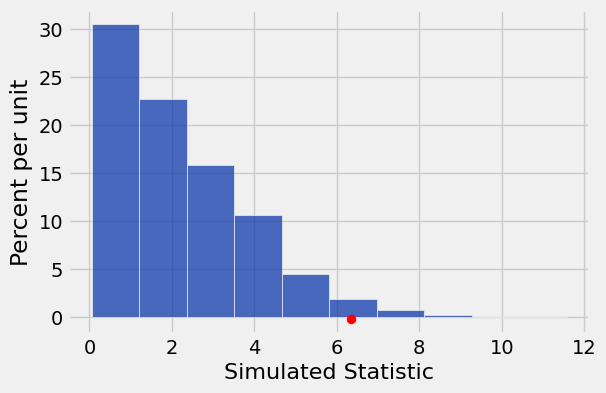

In [24]:
# Run this cell to produce a histogram of the simulated statistics

Table().with_columns('Simulated Statistic', simulated_statistics).hist()
plt.scatter(observed_statistic, -0.002, color='red', s=40);

<!-- END QUESTION -->

**Question 1.8.** Using `simulated_statistics`, `observed_statistic`, and `num_simulations`, find the empirical p-value based on the simulation.

_Hint:_ Reading [11.3.6](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html#the-meaning-of-consistent) might be helpful for this question.


In [25]:
p_value = np.count_nonzero(simulated_statistics >= observed_statistic) / num_simulations
p_value

0.020750000000000001

In [26]:
grader.check("q1_8")

q1_8 results: All test cases passed!

**Question 1.9.** Assign `correct_doctor` to the number corresponding to the correct statement below. Use the 5% cutoff for the p-value.

1. The data support Dr. DeNero's position more than they support Dr. Sahai's.
2. The data support Dr. Sahai's position more than they support Dr. DeNero's.

As a reminder, here are the two claims made by Dr. DeNero and Dr. Sahai:
> **Doctor DeNero:** "Oh wow, it's just like tossing a coin that lands heads with chance $\frac{3}{5}$. Heads you get Vaccine 1 and Tails you get Vaccine 2."

>**Doctor Sahai:** "No, it's not. We're not doing anything like tossing a coin."


In [27]:
correct_doctor = 1
correct_doctor

1

In [28]:
grader.check("q1_9")

q1_9 results: All test cases passed!

## 2. Using TVD as a Test Statistic

Before beginning this section, please read [this section](https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html#a-new-statistic-the-distance-between-two-distributions) of the textbook on TVD!

**Total variation distance (TVD)** is a special type of test statistic that we use when we want to compare two distributions of *categorical data*. It is often used when we observe that a set of observed proportions/probabilities is different than what we expect under the null model. 

Consider a six-sided die that we roll 6,000 times. If the die is fair, we would expect that each face comes up $\frac{1}{6}$ of the time. By random chance, a fair die won't always result in equal proportions (that is, we won't get exactly 1,000 of each face). However, if we suspect that the die might be unfair based on the data, we can conduct a hypothesis test using TVD to compare the expected [$\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$] distribution to what is actually observed.

In this part of the homework, we'll look at how we can use TVD to determine the effect that different factors have on happiness. 

We will be working with data from the [Gallup World Poll](https://worldhappiness.report/ed/2023/world-happiness-trust-and-social-connections-in-times-of-crisis/#ranking-of-happiness-2020-2022) that is presented in the World Happiness Report, a survey of the state of global happiness. The survey ranked 137 countries by overall happiness and estimated the influence that economic production, social support, life expectancy, freedom, absence of corruption, and generosity had on population happiness. The study has been repeated for several years, but we'll be looking at data from the 2023 survey.

Run the cell below to load in the `happiness_scores` table.

In [29]:
happiness_scores = Table.read_table("happiness_scores.csv").drop(12, 13, 14).take(np.arange(137))
happiness_scores.show(5)

Country,Happiness Rank,Happiness Score,Standard error of happiness score,Lower Confidence Interval,Upper Confidence Interval,Economy (Log GDP per capita),Family,Health (life expectancy),Freedom,Generosity,Trust (Government Corruption)
Finland,1,7.804,0.036,7.875,7.733,1.888,1.585,0.535,0.772,0.126,0.535
Denmark,2,7.586,0.041,7.667,7.506,1.949,1.548,0.537,0.734,0.208,0.525
Iceland,3,7.53,0.049,7.625,7.434,1.926,1.62,0.559,0.738,0.25,0.187
Israel,4,7.473,0.032,7.535,7.411,1.833,1.521,0.577,0.569,0.124,0.158
Netherlands,5,7.403,0.029,7.46,7.346,1.942,1.488,0.545,0.672,0.251,0.394


Participants in the study were asked to evaluate their life satisfaction from a scale of 0 (worst possible life) to 10 (best possible life). The responses for each country were averaged to create the `Happiness Score`.

The columns `Economy (Log GDP per Capita)`, `Family`, `Health (Life Expectancy)`, `Freedom`, `Generosity`, and `Trust (Government Corruption)` estimate the extent to which each factor influences happiness, both for better or for worse. The happiness score is the sum of these factors; the larger a factor is, the more it contributes to overall happiness. [In other words, if you add up all the factors (in addition to a "Difference from Dystopia" value we excluded in the dataset), you get the happiness score.]

Let's look at the different factors that affect happiness in the United States. Run the cell below to view the row in `us_happiness` that contains data for the United States.

In [30]:
us_happiness = happiness_scores.where("Country", "United States")
us_happiness

Country,Happiness Rank,Happiness Score,Standard error of happiness score,Lower Confidence Interval,Upper Confidence Interval,Economy (Log GDP per capita),Family,Health (life expectancy),Freedom,Generosity,Trust (Government Corruption)
United States,15,6.894,0.047,6.986,6.802,1.98,1.46,0.39,0.557,0.21,0.172


**To compare the different factors, we'll look at the proportion of the happiness score that is attributed to each variable. 
You can find these proportions in the table `us_happiness_factors` after running the cell below.**

*Note:* The factors shown in `us_happiness` don't add up exactly to the happiness score, so we adjusted the proportions to  only account for the data we have access to. The proportions were found by dividing each Happiness Factor value by the sum of all Happiness Factor values in `us_happiness`.

In [31]:
us_happiness_factors = Table().read_table("us_happiness_factors.csv")
us_happiness_factors

Happiness Factor,Proportion of Happiness Score
Economy (GDP per Capita),0.41521
Family,0.306036
Health (Life Expectancy),0.0818086
Freedom,0.116865
Trust (Government Corruption),0.0361179
Generosity,0.0439626


<!-- BEGIN QUESTION -->

**Question 2.1.** Suppose we want to test whether or not each factor contributes the same amount to the overall Happiness Score. Define the null hypothesis, alternative hypothesis, and test statistic in the cell below.

*Note:* Please format your answer as follows:
- Null Hypothesis: ...  
- Alternative Hypothesis: ...  
- Test Statistic: ...  


Null Hypothesis: Each happiness factor contributes equally to the overall happiness score in the US.
Alternative Hypothesis: At least one happiness factor contributes a different amount to the overall happiness score compared to the others. 
Test Statistic: The total variation distance between the observed distribution of factor contributions and the uniform distribution.

<!-- END QUESTION -->

**Question 2.2.** Write a function `calculate_tvd` that takes in the observed distribution (`obs_dist`) and expected distribution under the null hypothesis (`null_dist`) and calculates the total variation distance. Use this function to set `observed_tvd` to be equal to the observed test statistic.


In [32]:
null_distribution = make_array(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)

def calculate_tvd(obs_dist, null_dist):
    return 0.5 * np.sum(np.abs(obs_dist - null_dist))
    
us_obs = us_happiness_factors.column("Proportion of Happiness Score")
observed_tvd = calculate_tvd(us_obs, null_distribution)
observed_tvd

0.38791256366666665

In [33]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Create an array called `simulated_tvds` that contains 10,000 simulated values under the null hypothesis. Assume that the original sample consisted of 1,000 individuals.

*Hint:* The `sample_proportions` function may be helpful to you. Refer to the [Python Reference Sheet](http://data8.org/su24/reference/) to read up on it!


In [34]:
simulated_tvds = make_array()
sample_size = 1000

for _ in range(10000):
    simulated_dist = sample_proportions(sample_size, null_distribution)
    tvd = calculate_tvd(simulated_dist, null_distribution)
    simulated_tvds = np.append(simulated_tvds, tvd)

In [35]:
grader.check("q2_3")

q2_3 results: All test cases passed!

Run the cell below to plot a histogram of your simulated test statistics, as well as a red dot representing the observed value of the test statistic.

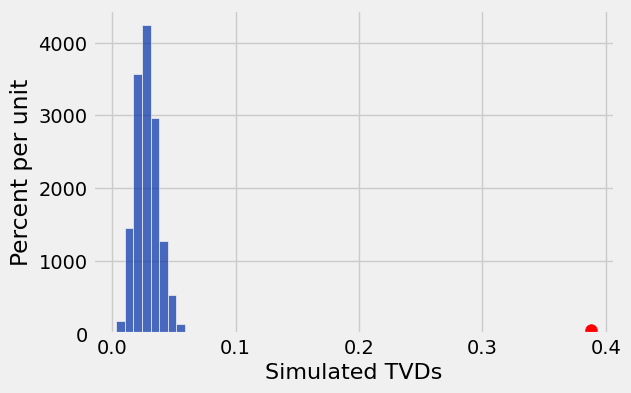

In [36]:
Table().with_column("Simulated TVDs", simulated_tvds).hist()
plt.scatter(observed_tvd, 0.5, color='red', s=70, zorder=2);
plt.show();

**Question 2.4.** Use your simulated statistics to calculate the p-value of your test. Make sure that this number is consistent with what you observed in the histogram above.


In [37]:
p_value_tvd = np.count_nonzero(simulated_tvds >= observed_tvd) / 10000
p_value_tvd

0.0

In [38]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.5.** What can you conclude about how each factor contributes to the overall happiness score in the US? Explain your answer using the results of your hypothesis test. Assume a p-value cutoff of 5%.


Since the p-value is less than .05 we reject the null hypothesis. This means some factors can contribute more to happiness than others. 